<style>
.wzor {
  /* width: auto; */
  /* padding: auto; */
  border: 0.5rem solid gray;
  /* margin: 0; */
  background-color: lightgray;
}
</style>


# Modele analizy danych

Tomasz Rodak

---

## Literatura
   1. James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor,
      J. (2023). An Introduction to Statistical Learning: With
      Applications in Python.
      
      [ISLP](https://www.statlearning.com/)
   
   2. Bishop, C. M., & Nasrabadi, N. M. (2006). Pattern recognition and
      machine learning (Vol. 4, No. 4, p. 738). New York: springer. 
   
      [PRML](https://www.microsoft.com/en-us/research/people/cmbishop/prml-book/)
   
   3. Kroese, D. P., Botev, Z., Taimre, T., & Vaisman, R. (2019). Data
      science and machine learning: mathematical and statistical
      methods. CRC Press.
   
      [https://people.smp.uq.edu.au/DirkKroese/DSML/](https://people.smp.uq.edu.au/DirkKroese/DSML/)
   
   4. Hastie, T., Tibshirani, R., Friedman, J. H., & Friedman,
      J. H. (2009). The elements of statistical learning: data mining,
      inference, and prediction (Vol. 2, pp. 1-758). New York:
      springer.
   
      [https://hastie.su.domains/ElemStatLearn/](https://hastie.su.domains/ElemStatLearn/)
   
   5. Murphy, K. P. (2022). Probabilistic machine learning: an
      introduction. MIT press.
   
      [https://probml.github.io/pml-book/book1.html](https://probml.github.io/pml-book/book1.html)
   
   6. Murphy, K. P. (2023). Probabilistic machine learning: Advanced
      topics. MIT press.
   
      [https://probml.github.io/pml-book/book2.html](https://probml.github.io/pml-book/book2.html)
   
   7. Bishop, C. M., & Bishop, H (2024). Deep learning. Springer.
   
      [https://www.bishopbook.com/](https://www.bishopbook.com/)
   
   8. Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.
   
      [https://www.deeplearningbook.org/](https://www.deeplearningbook.org/)

---

## Wykład IX

ISLP, rozdział 4.6

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as smd

## Uogólniony model liniowy (*Generalized Linear Model*, GLM)

### Regresja liniowa dla *Bikeshare*

Zbiór danych *Bikeshare* zawiera informacje o liczbie wypożyczonych rowerów w zależności od pory roku, dnia tygodnia, godziny dnia, pogody itp.

In [3]:
df = pd.read_csv('datasets/Bikeshare.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bikers
0,1,Jan,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0,3,13,16
1,1,Jan,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0,8,32,40
2,1,Jan,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0,5,27,32
3,1,Jan,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0,3,10,13
4,1,Jan,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0,0,1,1


Rodzaje wartości dla zmiennej `weathersit`:

In [4]:
df.weathersit.value_counts()

weathersit
clear              5645
cloudy/misty       2218
light rain/snow     781
heavy rain/snow       1
Name: count, dtype: int64

Kodowanie zmiennych kategorycznych `weathersit`, `mnth` i `hr`. 
* `weathersit` - trzy zmienne binarne, wartością bazową jest `clear`
* `mnth` - 12 zmiennych binarnych
* `hr` - 24 zmienne binarne

In [5]:
mnth_encoded = pd.get_dummies(df.mnth).astype(int)
hr_encoded = pd.get_dummies(df.hr, prefix='hr').astype(int)
df = pd.concat([df, mnth_encoded, hr_encoded], axis=1)

df['cloudy_misty'] = df['weathersit'].map({
    'cloudy/misty': 1,
    'clear': 0,
    'light rain/snow': 0,
    'heavy rain/snow': 0
})
df['light_rain_snow'] = df['weathersit'].map({
    'light rain/snow': 1,
    'clear': 0,
    'cloudy/misty': 0,
    'heavy rain/snow': 0
})
df['heavy_rain_snow'] = df['weathersit'].map({
    'heavy rain/snow': 1,
    'clear': 0,
    'cloudy/misty': 0,
    'light rain/snow': 0
})

Stosujemy regresję liniową do przewidywania liczby wypożyczonych rowerów:

In [6]:
variables = [
    'workingday',
    'temp',
    'cloudy_misty',
    'light_rain_snow',
    'heavy_rain_snow',
    'Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug',
    'Sept', 'Oct', 'Nov', 'Dec',
    'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7',
    'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14',
    'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21',
    'hr_22', 'hr_23'
]
formula = 'bikers ~ ' + ' + '.join(str(v) for v in variables)
reg = sm.OLS.from_formula(formula, df)
regresult = reg.fit()

In [7]:
regresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 bikers   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     457.3
Date:                Mon, 15 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:45:57   Log-Likelihood:                -49743.
No. Observations:                8645   AIC:                         9.957e+04
Df Residuals:                    8605   BIC:                         9.985e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          65.4199      4.562     14.340      0.000      56.477      74.363
workingday          1.2696      1.784      0.711      0.477      -2.228       4.768
temp              157.2094     10.261     15.321      0.000     137.095     177.324
cloudy_misty      -12.8903      1.964     -6.562      0.000     -16.741      -9.040
light_rain_snow   -66.4944      2.965    -22.425      0.000     -72.307     -60.682
heavy_rain_snow  -109.7446     76.667     -1.431      0.152    -260.031      40.542
Jan               -40.6354      3.830    -10.609      0.000     -48.144     -33.127
Feb               -33.7902      3.342    -10.110      0.000     -40.342     -27.238
March             -24.0840      2.995     -8.041      0.000     -29.955     -18.213
April               0.7895      2.749      0.287      0.774      -4.599       6.178
May                31.9217      2.992     10.670      0.000      26.057      37.786
June               27.1833      3.701      7.346      0.000      19.929      34.437
July                4.6890      4.173      1.124      0.261      -3.491      12.869
Aug                12.6076      3.778      3.337      0.001       5.202      20.014
Sept               26.0428      3.224      8.078      0.000      19.723      32.363
Oct                35.1988      2.704     13.015      0.000      29.897      40.500
Nov                19.6746      2.776      7.087      0.000      14.233      25.117
Dec                 5.8222      2.985      1.951      0.051      -0.029      11.674
hr_0              -93.4162      3.945    -23.679      0.000    -101.150     -85.683
hr_1             -107.9955      3.953    -27.320      0.000    -115.744    -100.247
hr_2             -114.9953      4.000    -28.748      0.000    -122.837    -107.154
hr_3             -124.5570      4.062    -30.666      0.000    -132.519    -116.595
hr_4             -130.3237      4.095    -31.821      0.000    -138.352    -122.296
hr_5             -117.5517      4.013    -29.294      0.000    -125.418    -109.686
hr_6              -72.8165      3.968    -18.351      0.000     -80.595     -65.038
hr_7               26.6769      3.949      6.755      0.000      18.936      34.418
hr_8              130.2457      3.938     33.070      0.000     122.525     137.966
hr_9               27.1657      3.935      6.904      0.000      19.452      34.879
hr_10              -9.6149      3.946     -2.437      0.015     -17.349      -1.881
hr_11              12.0072      3.963      3.030      0.002       4.238      19.776
hr_12              43.8675      3.984     11.011      0.000      36.058      51.677
hr_13              42.6197      4.008     10.634      0.000      34.764      50.476
hr_14              33.2199      4.028      8.247      0.000      25.324      41.115
hr_15              38.6703      4.033      9.589      0.000

Współczynniki modelu dla miesięcy:

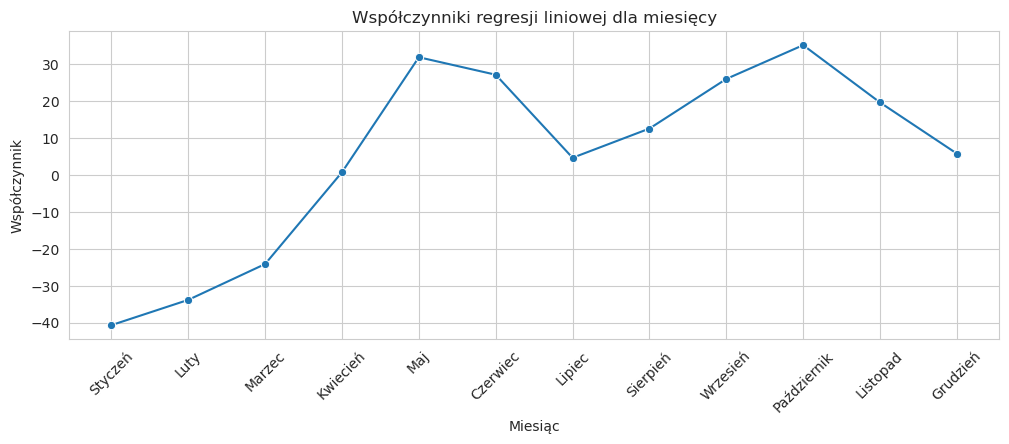

In [8]:
fig = plt.figure(figsize=(12, 4))
sns.lineplot(x=range(1, 13), y=regresult.params.loc['Jan':'Dec'], marker='o')
plt.xlabel('Miesiąc')
plt.ylabel('Współczynnik')
plt.xticks(range(1, 13), ['Styczeń', 'Luty', 'Marzec', 'Kwiecień', 'Maj', 'Czerwiec',
                         'Lipiec', 'Sierpień', 'Wrzesień', 'Październik', 'Listopad', 'Grudzień'], rotation=45)
plt.title('Współczynniki regresji liniowej dla miesięcy');

Współczynniki modelu dla godzin:

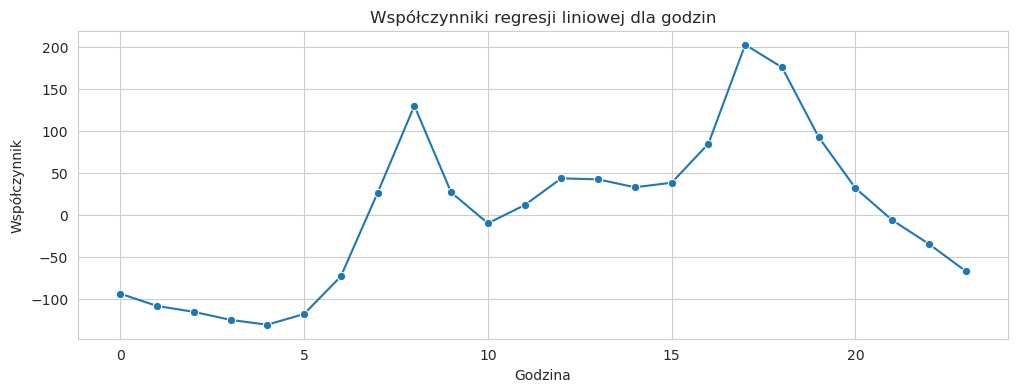

In [9]:
fig = plt.figure(figsize=(12, 4))
sns.lineplot(x=range(0, 24), y=regresult.params.loc['hr_0':'hr_23'], marker='o')
plt.xlabel('Godzina')
plt.ylabel('Współczynnik')
plt.title('Współczynniki regresji liniowej dla godzin');

Liczba ujemnych predycji:

In [10]:
len(regresult.fittedvalues[regresult.fittedvalues < 0]) / len(regresult.fittedvalues) * 100

9.635627530364372

Zmiana wariancji w zależności od godziny. Założenie o stałej wariancji nie jest spełnione.

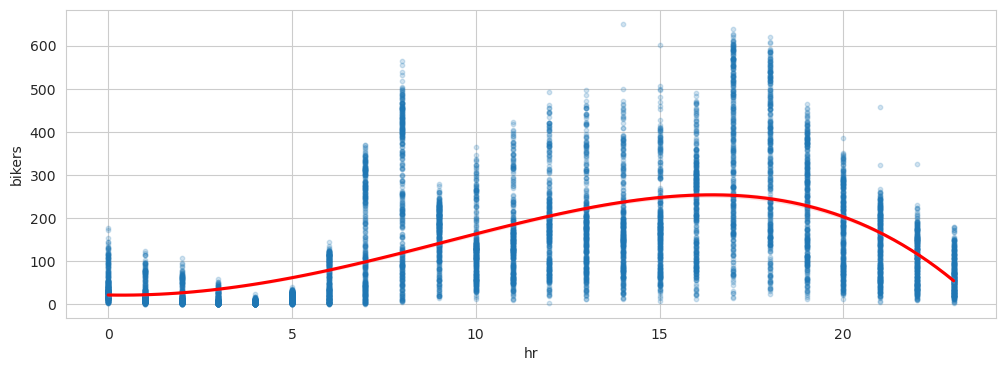

In [11]:
fig = plt.figure(figsize=(12, 4))
sns.regplot(x='hr', y='bikers', data=df, order=4,
            scatter_kws={'alpha': 0.2, 's': 10},
            line_kws={'color': 'red'}
            );

Sytuację nieco poprawia transformacja logarytmiczna zmiennej celu:

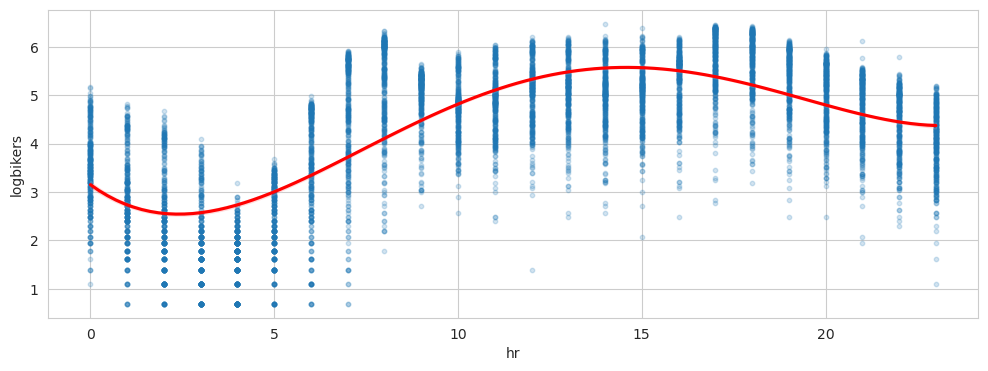

In [12]:
df['logbikers'] = np.log(df['bikers'] + 1)
fig = plt.figure(figsize=(12, 4))
sns.regplot(x='hr', y='logbikers', data=df, order=4,
            scatter_kws={'alpha': 0.2, 's': 10},
            line_kws={'color': 'red'}
            );

Model z logarytmem zmiennej `bikers`:

In [13]:
formula = "logbikers ~ " + " + ".join(str(v) for v in variables)
reg = sm.OLS.from_formula(formula, df)
regresult = reg.fit()

regresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logbikers   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     962.4
Date:                Mon, 15 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:46:00   Log-Likelihood:                -7743.6
No. Observations:                8645   AIC:                         1.557e+04
Df Residuals:                    8605   BIC:                         1.585e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.4508      0.035     97.426      0.000       3.381       3.520
workingday         -0.0123      0.014     -0.890      0.374      -0.039       0.015
temp                1.0415      0.080     13.073      0.000       0.885       1.198
cloudy_misty       -0.0603      0.015     -3.951      0.000      -0.090      -0.030
light_rain_snow    -0.6602      0.023    -28.678      0.000      -0.705      -0.615
heavy_rain_snow    -0.8226      0.595     -1.382      0.167      -1.989       0.344
Jan                -0.3103      0.030    -10.435      0.000      -0.369      -0.252
Feb                -0.0975      0.026     -3.759      0.000      -0.148      -0.047
March              -0.0199      0.023     -0.857      0.391      -0.066       0.026
April               0.2795      0.021     13.094      0.000       0.238       0.321
May                 0.5429      0.023     23.371      0.000       0.497       0.588
June                0.4903      0.029     17.065      0.000       0.434       0.547
July                0.3950      0.032     12.191      0.000       0.331       0.458
Aug                 0.4028      0.029     13.731      0.000       0.345       0.460
Sept                0.4924      0.025     19.673      0.000       0.443       0.541
Oct                 0.5471      0.021     26.056      0.000       0.506       0.588
Nov                 0.4414      0.022     20.478      0.000       0.399       0.484
Dec                 0.2873      0.023     12.397      0.000       0.242       0.333
hr_0               -0.6495      0.031    -21.203      0.000      -0.710      -0.589
hr_1               -1.2202      0.031    -39.756      0.000      -1.280      -1.160
hr_2               -1.6569      0.031    -53.350      0.000      -1.718      -1.596
hr_3               -2.1482      0.032    -68.121      0.000      -2.210      -2.086
hr_4               -2.4393      0.032    -76.711      0.000      -2.502      -2.377
hr_5               -1.6186      0.031    -51.950      0.000      -1.680      -1.557
hr_6               -0.4538      0.031    -14.730      0.000      -0.514      -0.393
hr_7                0.4812      0.031     15.693      0.000       0.421       0.541
hr_8                1.1305      0.031     36.970      0.000       1.071       1.190
hr_9                0.8478      0.031     27.748      0.000       0.788       0.908
hr_10               0.5422      0.031     17.700      0.000       0.482       0.602
hr_11               0.6664      0.031     21.657      0.000       0.606       0.727
hr_12               0.8555      0.031     27.657      0.000       0.795       0.916
hr_13               0.8485      0.031     27.269      0.000       0.788       0.910
hr_14               0.7851      0.031     25.104      0.000       0.724       0.846
hr_15               0.8256      0.031     26.367      0.000

### Regresja Poissona

#### Rozkład Poissona

Niech $Y$ będzie zmienną losową o wartościach w zbiorze $\{0, 1, 2, \ldots\}$. Wówczas $Y$ ma rozkład Poissona z parametrem $\lambda > 0$ jeśli

<div class="wzor">

$$
P(Y = k) = \frac{\lambda^k}{k!} e^{-\lambda}, \quad k = 0, 1, 2, \ldots
$$

</div>

Wartości $P(Y = k)$ są prawdopodobieństwami, więc suma wszystkich wartości musi być równa 1, i rzeczywiście tak jest:

$$
\sum_{k=0}^\infty P(Y = k) = \sum_{k=0}^\infty \frac{\lambda^k}{k!} e^{-\lambda} = e^{-\lambda} \sum_{k=0}^\infty \frac{\lambda^k}{k!} = e^{-\lambda} e^\lambda = 1.
$$

Ponieważ

\begin{align*}
\mathbf{E}(Y) &= \sum_{k=0}^\infty k P(Y = k) = \sum_{k=1}^\infty k \frac{\lambda^k}{k!} e^{-\lambda} = e^{-\lambda} \sum_{k=1}^\infty \frac{\lambda^k}{(k-1)!} \\
&= e^{-\lambda} \lambda \sum_{k=1}^\infty \frac{\lambda^{k-1}}{(k-1)!} = e^{-\lambda} \lambda e^\lambda = \lambda,
\end{align*}

więc $\lambda$ jest wartością oczekiwaną zmiennej $Y$.

Ponadto

\begin{align*}
\mathbf{Var}(Y) &= \mathbf{E}(Y^2) - \mathbf{E}(Y)^2 = \sum_{k=0}^\infty k^2 P(Y = k) - \lambda^2 \\
&= \sum_{k=1}^\infty k^2 \frac{\lambda^k}{k!} e^{-\lambda} - \lambda^2 = 
\lambda e^{-\lambda} \sum_{k=1}^\infty k\frac{\lambda^{k-1}}{(k-1)!} - \lambda^2 \\
&= \lambda e^{-\lambda} \left( \sum_{k=1}^\infty \frac{\lambda^{k}}{(k-1)!}\right)' - \lambda^2=
\lambda e^{-\lambda} \left( \sum_{k=0}^\infty \frac{\lambda^{k+1}}{k!}\right)' - \lambda^2 \\
&= \lambda e^{-\lambda} \left( \lambda e^\lambda \right)' - \lambda^2=
\lambda e^{-\lambda} \left( e^\lambda + \lambda e^\lambda \right) - \lambda^2 \\
&= \lambda (1 + \lambda) - \lambda^2 = \lambda.
\end{align*}

Podsumowując, jeśli $Y$ ma rozkład Poissona z parametrem $\lambda$, to

<div class="wzor">

\begin{equation*}
\mathbf{E}(Y) = \mathbf{Var}(Y) = \lambda.
\end{equation*}

</div>

#### Regresja Poissona

W modelu regresji Poissona zakładamy, że zmienna celu $Y$ ma rozkład Poissona z parametrem $\lambda$, który jest funkcją liniową zmiennych objaśniających $X_1, \ldots, X_p$.

Dokładniej, zakładamy że



<div class="wzor">

\begin{equation*}
Y|X_1, \ldots, X_p \sim \text{Poisson}(\lambda(X_1, \ldots, X_p)),
\end{equation*}

</div>

gdzie



<div class="wzor">

\begin{equation*}
\log \lambda(X_1, \ldots, X_p) = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p,
\end{equation*}

</div>

lub równoważnie




<div class="wzor">

\begin{equation*}
\lambda(X_1, \ldots, X_p) = \exp(\beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p).
\end{equation*}

</div>

Wówczas

<div class="wzor">

\begin{equation*}
\mathbf{E}(Y|X_1, \ldots, X_p) = \lambda(X_1, \ldots, X_p) = \exp(\beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p).
\end{equation*}

</div>

Parametry $\beta_0, \ldots, \beta_p$ są nieznane i należy je oszacować na podstawie danych.

#### Estymacja parametrów modelu regresji Poissona

Załóżmy, że mamy $n$ obserwacji $(k_i, x_{i1}, \ldots, x_{ip})$, $i = 1, \ldots, n$. Ze wzoru na rozkład Poissona mamy

\begin{equation*}
P(Y = k_i|X_1 = x_{i1}, \ldots, X_p = x_{ip}) = \frac{\lambda(x_{i1}, \ldots, x_{ip})^{k_i}}{k_i!} e^{-\lambda(x_{i1}, \ldots, x_{ip})}.
\end{equation*}

Parametry $\beta_0, \ldots, \beta_p$ szacujemy metodą największej wiarygodności. W myśl powyższego wzoru funkcja wiarygodności ma postać

\begin{equation*}
\ell(\beta_0, \ldots, \beta_p) = \prod_{i=1}^n \frac{\lambda(x_{i1}, \ldots, x_{ip})^{k_i}}{k_i!} e^{-\lambda(x_{i1}, \ldots, x_{ip})}.
\end{equation*}

Zgodnie z metodą największej wiarygodności szukamy parametrów $\hat{\beta}_0, \ldots, \hat{\beta}_p$, które maksymalizują funkcję wiarygodności $\ell(\beta_0, \ldots, \beta_p)$.

In [14]:
ormula = "bikers ~ " + " + ".join(str(v) for v in variables)
poisson = sm.GLM.from_formula(formula, df, family=sm.families.Poisson())
poisson_result = poisson.fit()

In [15]:
poisson_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              logbikers   No. Observations:                 8645
Model:                            GLM   Df Residuals:                     8605
Model Family:                 Poisson   Df Model:                           39
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14643.
Date:                Mon, 15 Dec 2025   Deviance:                       960.66
Time:                        10:46:01   Pearson chi2:                     910.
No. Iterations:                   100   Pseudo R-squ. (CS):             0.3258
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.1792      0.029     40.683      0.000       1.122       1.236
workingday         -0.0020      0.011     -0.177      0.859      -0.024       0.020
temp                0.2018      0.065      3.119      0.002       0.075       0.329
cloudy_misty       -0.0123      0.012     -0.997      0.319      -0.036       0.012
light_rain_snow    -0.1628      0.020     -8.196      0.000      -0.202      -0.124
heavy_rain_snow    -0.1635      0.527     -0.310      0.757      -1.197       0.870
Jan                -0.0667      0.026     -2.602      0.009      -0.117      -0.016
Feb                -0.0029      0.022     -0.132      0.895      -0.046       0.040
March               0.0188      0.020      0.956      0.339      -0.020       0.057
April               0.0996      0.017      5.717      0.000       0.065       0.134
May                 0.1612      0.018      8.737      0.000       0.125       0.197
June                0.1525      0.023      6.672      0.000       0.108       0.197
July                0.1335      0.026      5.155      0.000       0.083       0.184
Aug                 0.1350      0.023      5.777      0.000       0.089       0.181
Sept                0.1537      0.020      7.751      0.000       0.115       0.193
Oct                 0.1620      0.017      9.717      0.000       0.129       0.195
Nov                 0.1357      0.017      7.802      0.000       0.102       0.170
Dec                 0.0969      0.019      5.053      0.000       0.059       0.135
hr_0               -0.1081      0.028     -3.932      0.000      -0.162      -0.054
hr_1               -0.2880      0.030     -9.567      0.000      -0.347      -0.229
hr_2               -0.4512      0.033    -13.686      0.000      -0.516      -0.387
hr_3               -0.6694      0.037    -18.010      0.000      -0.742      -0.597
hr_4               -0.8241      0.040    -20.418      0.000      -0.903      -0.745
hr_5               -0.4377      0.033    -13.338      0.000      -0.502      -0.373
hr_6               -0.0566      0.027     -2.092      0.036      -0.110      -0.004
hr_7                0.1714      0.024      7.078      0.000       0.124       0.219
hr_8                0.3036      0.023     13.410      0.000       0.259       0.348
hr_9                0.2482      0.023     10.719      0.000       0.203       0.294
hr_10               0.1854      0.024      7.770      0.000       0.139       0.232
hr_11               0.2116      0.024      8.947      0.000       0.165       0.258
hr_12               0.2498      0.023     10.693      0.000       0.204       0.296
hr_13               0.2485      0.024     10.567      0.000       0.202       0.295
hr_14               0.2362      0.024      9.934      0.000       0.190       0.283
hr_15               0.2442      0.024     10.297      0.000

Współczynniki modelu regresji Poissona dla miesięcy:

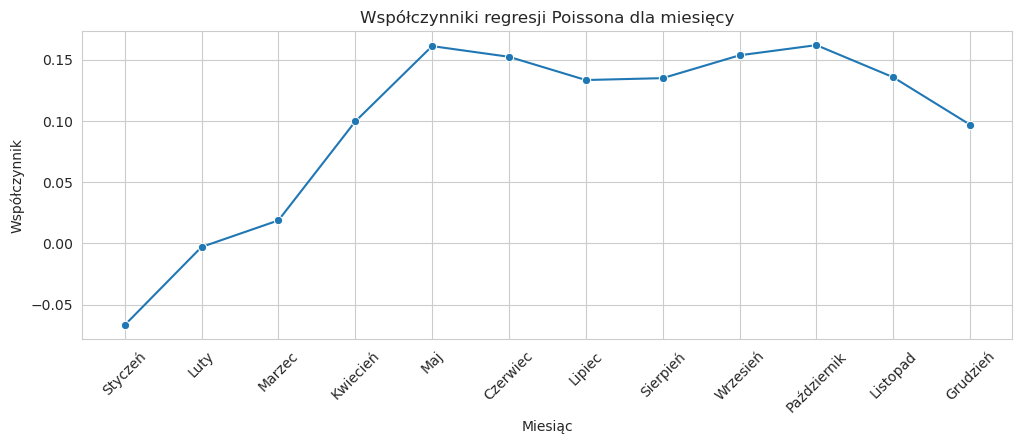

In [16]:
fig = plt.figure(figsize=(12, 4))
sns.lineplot(x=range(1, 13), y=poisson_result.params.loc['Jan':'Dec'], marker='o')
plt.xlabel('Miesiąc')
plt.ylabel('Współczynnik')
plt.xticks(range(1, 13), ['Styczeń', 'Luty', 'Marzec', 'Kwiecień', 'Maj', 'Czerwiec',
                         'Lipiec', 'Sierpień', 'Wrzesień', 'Październik', 'Listopad', 'Grudzień'], rotation=45)
plt.title('Współczynniki regresji Poissona dla miesięcy');

Współczynniki modelu regresji Poissona dla godzin:

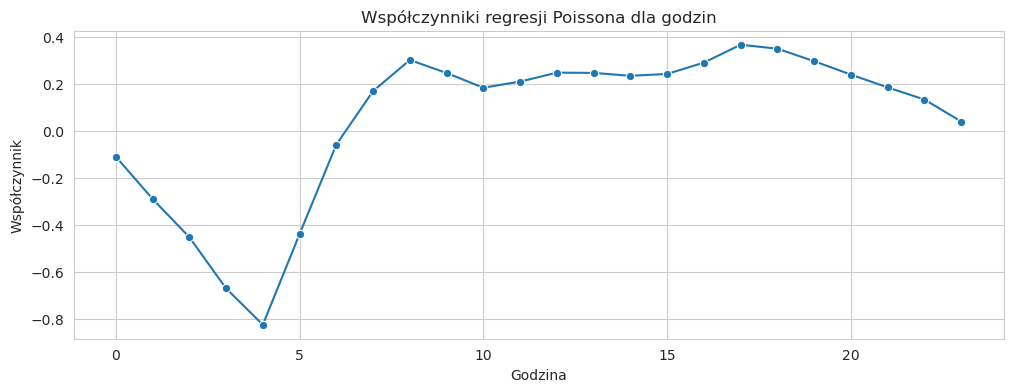

In [17]:
fig = plt.figure(figsize=(12, 4))
sns.lineplot(x=range(0, 24), y=poisson_result.params.loc['hr_0':'hr_23'], marker='o')
plt.xlabel('Godzina')
plt.ylabel('Współczynnik')
plt.title('Współczynniki regresji Poissona dla godzin');

##### Interpretacja. 

Jak zinterpretować współczynniki modelu regresji Poissona? Przykładowo, jak zmienia się liczba wypożyczeń rowerów, gdy przechodzimy od `wheathersit = clear` do `wheathersit = cloudy/misty`? Sytuacja jest tu podoobna do interpretacji współczynników modelu regresji liniowej. Załóżmy, że dodajemy jedynkę do jednego z predyktorów, resztę pozostawiając bez zmian. Dla uproszczenia załóżmy, że tym wybranym predyktorem jest $x_1$. Wówczas

\begin{align*}
\log \lambda(x_1 + 1, x_2, \ldots, x_p) - \log \lambda(x_1, x_2, \ldots, x_p) &= \beta_1 (x_1 + 1) + \beta_2 x_2 + \ldots + \beta_p x_p - \beta_1 x_1 - \beta_2 x_2 - \ldots - \beta_p x_p \\
&= \beta_1,
\end{align*}

więc

\begin{equation*}
\lambda(x_1 + 1, x_2, \ldots, x_p) = \lambda(x_1, x_2, \ldots, x_p) \cdot e^{\beta_1}.
\end{equation*}

Zatem 

\begin{equation*}
\lambda(\text{cloudy/misty}) = \lambda(\text{clear})\cdot \exp{\beta_{\text{cloudy/misty}}}=\lambda(\text{clear})\cdot e^{-0.0752} = 0.9275\cdot \lambda(\text{clear}).
\end{equation*}

(W powyższym wzorze dla uproszczenia pominięto pozostałe predyktory.) 
Jeśli więc pozostałe predyktory nie ulegają zmianie, to liczba wypożyczonych rowerów przy przejściu od `clear` do `cloudy/misty`
zmniejsza się, średnio, o czynnik $\exp(-0.0752) = 0.9275$, czyli o $7.3\%$.

W zmiennej `whethersit` dokonujemy porównania z wartością bazową `clear`. Jak zatem porównać przejście od `cloudy/misty` do `light rain/snow`? Przyjmijmy, że $x_1$ oznacza `cloudy/misty`, a $x_2$ oznacza `light rain/snow`. Wówczas

\begin{align*}
\log \lambda(1, 0, x_3, \ldots, x_p) - \log \lambda(0, 1, x_3, \ldots, x_p) &= \beta_1 - \beta_2,
\end{align*}

więc

\begin{equation*}
\lambda(1, 0, x_3, \ldots, x_p) = \lambda(0, 1, x_3, \ldots, x_p) \cdot e^{\beta_1 - \beta_2}.
\end{equation*}

Zatem

\begin{align*}
\lambda(\text{light rain/snow}) &= \lambda(\text{cloudy/misty})\cdot \exp(\beta_{\text{cloudy/misty}} - \beta_{\text{light rain/snow}})\\
&=\lambda(\text{cloudy/misty})\cdot e^{-0.5758 - (-0.0752)} = 0.5936 \cdot \lambda(\text{cloudy/misty}).
\end{align*}

Jeśli więc pozostałe predyktory nie ulegają zmianie, to liczba wypożyczonych rowerów przy przejściu od `cloudy/misty` do `light rain/snow` zmienia się, średnio, o czynnik $\exp(-0.5758 - (-0.0752)) = 0.5936$, czyli spada o $40.6\%$.



##### Zależność średnia-wariancja

W modelu regresji Poissona brak jest założenia o stałej wariancji. W tym przypadku wariancja zmienia się wraz ze średnią zgodnie z zależnością $\lambda = \mathbf{E}(Y) = \mathbf{Var}(Y)$. Zatem duża średnia oznacza również dużą wariancję i odwrotnie. W naszym modelu fakt ten pozostaje w zgodzie z wykresem rozrzutu liczby wypożyczonych rowerów w zależności od godziny dnia.

##### Nieujemność

W modelu regresji Poissona zmienna celu $Y$ przyjmuje wartości w zbiorze $\{0, 1, 2, \ldots\}$. Wartości te są nieujemne i całkowite, co jest oczekiwane w modelach zliczających liczbę wystąpień pewnego zdarzenia.

### GLM

Trzy poznane przez nas jak dotąd modele regresji liniowej, logistycznej i Poissona są szczególnymi przypadkami uogólnionego modelu liniowego (*Generalized Linear Model*, GLM). W każdym z tych modeli zakładamy pewną postać warunkowego rozkładu zmiennej celu $Y$ w zależności od zmiennych objaśniających $X_1, \ldots, X_p$. 

W modelu regresji liniowej zakładamy, że $Y|X_1, \ldots, X_p \sim \mathcal{N}(\mu(X_1, \ldots, X_p), \sigma^2)$, gdzie 

\begin{equation*}
\mu(X_1, \ldots, X_p) = \mathbf{E}(Y|X_1, \ldots, X_p) =  \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p.
\end{equation*}

W modelu regresji logistycznej zakładamy, że $Y|X_1, \ldots, X_p \sim \text{Bernoulli}(\mu(X_1, \ldots, X_p))$, gdzie 

\begin{align*}
\mu(X_1, \ldots, X_p) &= \mathbf{E}(Y|X_1, \ldots, X_p) = P(Y = 1|X_1, \ldots, X_p) \\
&= \sigma(\beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p) \\
&= \frac{1}{1 + \exp(-(\beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p))}.
\end{align*}

W modelu regresji Poissona zakładamy, że $Y|X_1, \ldots, X_p \sim \text{Poisson}(\lambda(X_1, \ldots, X_p))$, gdzie

\begin{equation*}
\lambda(X_1, \ldots, X_p) = \mathbf{E}(Y|X_1, \ldots, X_p) = \exp(\beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p).
\end{equation*}

Powyższe wzory uogólnia się do postaci z funkcją wiążącą (*link function*) $\eta\colon \mathbb{R} \to \mathbb{R}$, która łączy średnią $\mu(X_1, \ldots, X_p) = \mathbf{E}(Y|X_1, \ldots, X_p)$ z liniową kombinacją zmiennych objaśniających $\beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p$:

<div class="wzor">

\begin{equation*}
\eta(\mathbf{E}(Y|X_1, \ldots, X_p)) = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p.
\end{equation*}

</div>

W znanych nam modelach $\eta$ ma postać:
* $\eta(\mu) = \mu$ - model regresji liniowej
* $\eta(\mu) = \log \frac{\mu}{1 - \mu}$ - model regresji logistycznej
* $\eta(\mu) = \log \mu$ - model regresji Poissona

Rozkłady normalny, Bernoulliego i Poissona są szczególnymi przypadkami rozkładów z rodziny wykładniczej (*exponential family*). Z uogólnionym modelem liniowym mamy do czynienia wówczas, gdy zmienna celu $Y$ ma rozkład z rodziny wykładniczej, a funkcja wiążąca $\eta$ pozwala na wyrażenie średniej $\mu = \mathbf{E}(Y)$ jako funkcji liniowej zmiennych objaśniających $\beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p$.